In [2]:
import numpy as np 
import pandas as pd 
import networkx
import matplotlib.pyplot as plt

خواندن از فایل csv


In [3]:
df = pd.read_csv('dolar-gte20180828-lt20180928.csv')
df.head()

,id,peer_id,peer_type,peer_username,peer_title,peer_participants_count,date,fwd_id,fwd_peer_id,fwd_peer_type,...,fwd_peer_title,fwd_peer_participants_count,fwd_date,type,views,text,link,cid,peer_about,fwd_peer_about
0,1183,1107796988,channel,azadi_meis,نگاره های ' میثم آزادی ',5615.0,2018-09-06 20:28:50,NaN,NaN,NaN,...,NaN,NaN,NaN,text,43,انواع دلار:👇👇👇 @azadi_meis دلار رسمی دلار غیرر...,https://t.me/azadi_meis/1183,NaN,نگاره هایم از *اقتصاد،فلسفه،دین،سیاست* برای ...,NaN
1,957,1216359721,channel,leojewellery,leojewellery,175.0,2018-09-17 18:50:04,NaN,NaN,NaN,...,NaN,NaN,NaN,text,46,97/06/26 قیمت حقیقی دلار گزارش قیمت دلار برا...,https://t.me/leojewellery/957,NaN,💎 طلا و جواهری لئو آدرس: تهران - خيابان آذربا...,NaN
2,14114,1015607781,channel,tahercsgame,Game TAHERcs,787.0,2018-09-01 16:17:56,NaN,NaN,NaN,...,NaN,NaN,NaN,text,134,UNO 3.49 دلار 9.99 دلار Bloodborne 6.99 دلار 1...,https://t.me/tahercsgame/14114,NaN,آرشیو تمام بازیهای PC ، PS4 از سال 1998 تا الا...,NaN
3,39242,1059303976,channel,DaghNewss,اخبار داغ وسری ♨️ قیمت ارز,7234.0,2018-09-18 21:07:04,NaN,NaN,NaN,...,NaN,NaN,NaN,text,640,97/06/26 ساعت 21:02 قیمت حقیقی دلار گزارش قیم...,https://t.me/DaghNewss/39242,NaN,با ما به روز باشید. . . . ...,NaN
4,15093,1301403412,channel,newsdollar,🔻 نیوز دلار انلاین 🔺,6589.0,2018-09-18 21:07:05,NaN,NaN,NaN,...,NaN,NaN,NaN,text,725,97/06/26 ساعت 21:02 قیمت حقیقی دلار گزارش قیم...,https://t.me/newsdollar/15093,NaN,💰 دلار نیوز قیمت آنلاین ارز، طلا، سکه و اخبار ...,NaN


In [5]:
# انواع رکوردها
df['peer_type'].value_counts()

peer_type
channel             662322
user                  3591
bot                   2738
channelForbidden         8
Name: count, dtype: int64

In [6]:
# تعداد کانال ها
df[df['peer_type']=='channel']['peer_type'].value_counts()

peer_type
channel    662322
Name: count, dtype: int64

In [8]:
channel_df=df[df['peer_type']=='channel']

In [9]:
# کانال های با آی دی یکتا
nodes_arr=channel_df['peer_id'].unique()
nodes_arr

array([1107796988, 1216359721, 1015607781, ..., 1070020902, 1215865326,
       1007158905], dtype=int64)

In [10]:
# تبدیل نامپای به لیست
node_list=nodes_arr.tolist()
node_list

[1107796988,
 1216359721,
 1015607781,
 1059303976,
 1301403412,
 1322700508,
 1021441697,
 1091803322,
 1293375018,
 1349855051,
 1197642600,
 1367454518,
 1269675255,
 1266496580,
 1187066034,
 1267347366,
 1107108287,
 1201418917,
 1140913894,
 1328052558,
 1360253437,
 1162302217,
 1191730599,
 1070037967,
 1107159655,
 1264863675,
 1002085745,
 1007551751,
 1120479947,
 1207024402,
 1302129300,
 1216098820,
 1178929025,
 1008774234,
 1001748133,
 1008805057,
 1094745589,
 1245900195,
 1351561990,
 1121081565,
 1056037601,
 1215781354,
 1235968994,
 1063338973,
 1285126707,
 1178509101,
 1141826310,
 1083383298,
 1058226417,
 1333871386,
 1247303047,
 1138178531,
 1214436389,
 1184370653,
 1131942707,
 1341550377,
 1102611898,
 1115214993,
 1077240839,
 1071764148,
 1207054999,
 1073942804,
 1023816389,
 1272668306,
 1117270389,
 1161301600,
 1078869935,
 1093410396,
 1000595628,
 1295166525,
 1223098196,
 1070718197,
 1003287098,
 1229835947,
 1204645569,
 1120488248,
 1003205771,

In [11]:
channel_df['fwd_id'].value_counts()

fwd_id
6.0         393
258.0       320
41297.0     286
1454.0      256
41368.0     223
           ... 
12981.0       1
134355.0      1
10634.0       1
22288.0       1
22097.0       1
Name: count, Length: 17558, dtype: int64

In [21]:
# رکوردهایی که fwd_id دارند
channel_df[channel_df['fwd_id'] > 0].count()

id                             53900
peer_id                        53900
peer_type                      53900
peer_username                  53900
peer_title                     53900
peer_participants_count        53755
date                           53900
fwd_id                         53900
fwd_peer_id                    53900
fwd_peer_type                  53425
fwd_peer_username              47998
fwd_peer_title                 53425
fwd_peer_participants_count    46068
fwd_date                       53900
type                           53900
views                          53900
text                           53900
link                           53900
cid                                0
peer_about                     42742
fwd_peer_about                 34126
dtype: int64

In [13]:
fwd_channel_df=channel_df[channel_df['fwd_id'] > 0]

In [14]:
# ساخت لیست یال ها
edge_list=[]
for index, row in fwd_channel_df.iterrows():
    edge_list.append((row['peer_id'],int(row['fwd_peer_id'])))
len(edge_list)

53900

In [15]:
import networkx as nx
from collections import Counter

In [27]:
# ساخت گراف جهت دار وزن دار که وزن تعداد یال های یکسان است
g = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edge_list).items())
# print(*g.edges(data=True), sep='\n')

In [24]:
channel_info=[(x,y) for x,y in zip(fwd_channel_df['peer_id'],fwd_channel_df['peer_username'])]
channel_info.extend([(x,y) for x,y in zip(fwd_channel_df['fwd_peer_id'].astype('int64'),fwd_channel_df['fwd_peer_username'])])
channel_info=list(set(channel_info))
len(channel_info),channel_info[:10]

(20160,
 [(1129530678, 'tab_resale'),
  (1032813859, 'JOZVEGAH'),
  (1008718035, 'ostanhajavan'),
  (1070956246, 'khabarname12'),
  (1149531710, 'philips100'),
  (1241289104, 'lenkdoooooniiibanooo'),
  (1117518374, 'se7en_source'),
  (1072659161, 'hamechiiiiiizz'),
  (1366589383, 'Payesh_Saham'),
  (1124885898, 'RavandMedia')])

## 1. Network Statistics

In [30]:
from networkx import density
print('node count: ',len(g.nodes))
print('edge count: ',len(g.edges))
print('density: ',density(g))

node count:  20160
edge count:  23445
density:  5.7688696293041746e-05


## 2.Degree Distribution

### in degree


In [33]:
# درجات ورودی
in_degree=g.in_degree()
# in_degree

In [34]:
degree_sequence = sorted([d for n, d in in_degree], reverse=False)
degree_sequence[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [36]:
degreeCount = Counter(degree_sequence)
# degreeCount

In [37]:
deg, cnt = zip(*degreeCount.items())
len(deg)

77

In [38]:
len(cnt)

77

C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_1716\1638127107.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


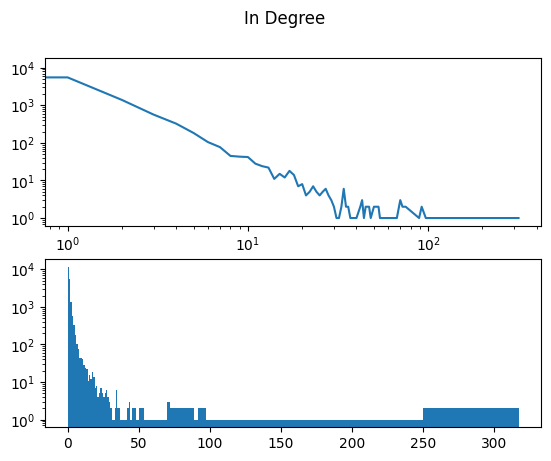

In [39]:
# توزیع درجات ورودی
fig, axs = plt.subplots(2)
fig.suptitle("In Degree")
axs[0].loglog(deg, cnt,)
axs[1].hist(deg,deg,weights=cnt,log=True)
fig.show()

In [40]:
#درجات خروجی
out_degree=g.out_degree()
# out_degree

C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_1716\840097821.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


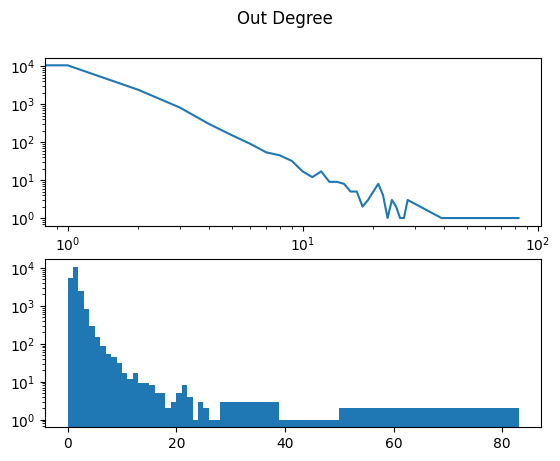

In [42]:
# توزیع درجات خروجی
out_degree=g.out_degree()
degree_sequence = sorted([d for n, d in out_degree], reverse=False)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, axs = plt.subplots(2)
fig.suptitle("Out Degree")
axs[0].loglog(deg, cnt,)
axs[1].hist(deg,deg,weights=cnt,log=True)
fig.show()

### total degree

In [43]:
# درجات کل
degree=g.degree()
# degree

C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_1716\1237799824.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


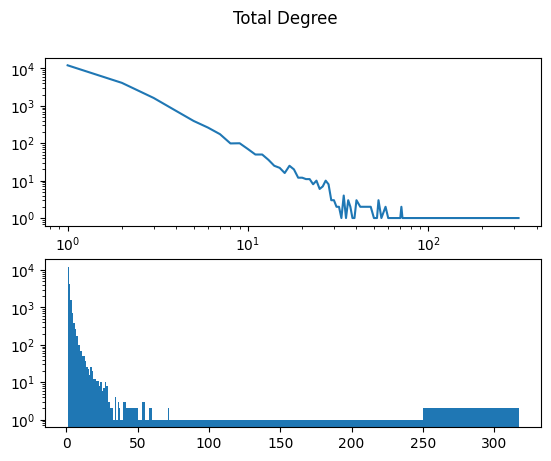

In [44]:
#توزیع درجات کل
degree_sequence = sorted([d for n, d in degree], reverse=False)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, axs = plt.subplots(2)
fig.suptitle("Total Degree")
axs[0].loglog(deg, cnt,)
axs[1].hist(deg,deg,weights=cnt,log=True)
fig.show()

### 3.Weighted Degree

In [45]:
# درجه وزن دار
degree=g.degree(weight='weight')
in_degree=g.in_degree(weight='weight')
out_degree=g.out_degree(weight='weight')
# degree

### weighted in degree


C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_1716\377790622.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


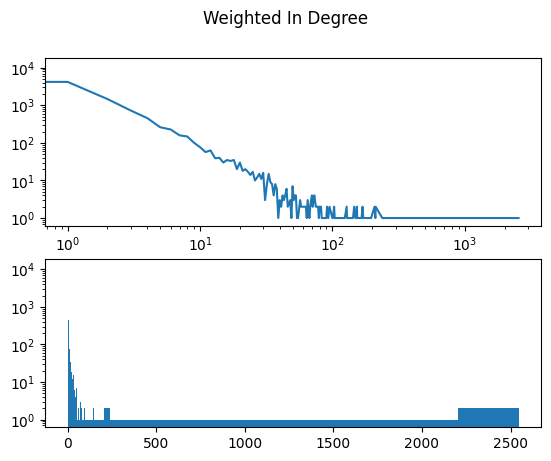

In [46]:
# توزیع درجه وزن دار ورودی
degree_sequence = sorted([d for n, d in in_degree], reverse=False)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, axs = plt.subplots(2)
fig.suptitle("Weighted In Degree")
axs[0].loglog(deg, cnt,)
axs[1].hist(deg,deg,weights=cnt,log=True)
fig.show()

### weighted out degree


C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_1716\2121617782.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


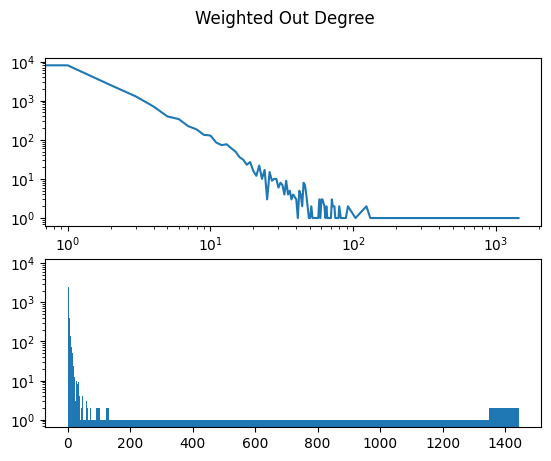

In [47]:
# توزیع درجه وزن دار خروجی
degree_sequence = sorted([d for n, d in out_degree], reverse=False)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, axs = plt.subplots(2)
fig.suptitle("Weighted Out Degree")
axs[0].loglog(deg, cnt,)
axs[1].hist(deg,deg,weights=cnt,log=True)
fig.show()

## weighted node strength (sum of weights of in/out edges)


C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_1716\544237623.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


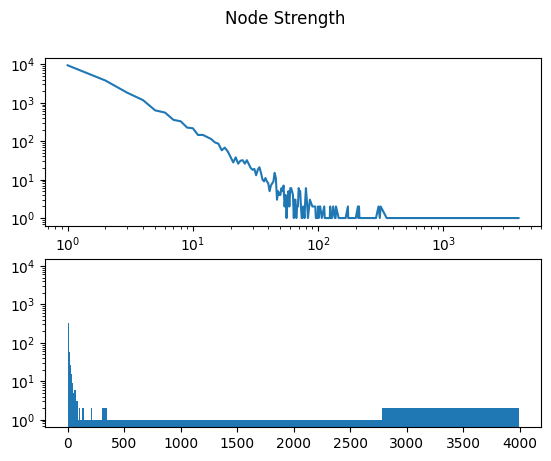

In [48]:
# توزیع قوت گره
degree_sequence = sorted([d for n, d in degree], reverse=False)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, axs = plt.subplots(2)
fig.suptitle("Node Strength")
axs[0].loglog(deg, cnt,)
axs[1].hist(deg,deg,weights=cnt,log=True)
fig.show()

## 4. Top Nodes


In [49]:
count=20

### 4.1 20 Top most referenced nodes

In [50]:
# 20 گره با بیشترین ارجاع
in_degree=sorted(g.in_degree(), key=lambda x: x[1], reverse=True)
most_referenced=[x for x,cnt in in_degree[:count]]
len(most_referenced)

20

In [51]:
in_degree[:count]

[(1097706613, 317),
 (1177396255, 250),
 (1311950601, 246),
 (1368197847, 233),
 (1344836536, 205),
 (1350209421, 194),
 (1107916542, 182),
 (1213964996, 170),
 (1250843962, 156),
 (1097063637, 155),
 (1165662150, 140),
 (1004069147, 129),
 (1070653504, 128),
 (1110010802, 122),
 (1002062924, 118),
 (1052483280, 102),
 (1260070575, 98),
 (1079462962, 97),
 (1144750748, 92),
 (1095047149, 92)]

In [53]:
# آیدی و نام کاربری
channel_info
usernames=[(id,username) for id,username in channel_info if id in most_referenced]
usernames

[(1107916542, 'tablighat_dancee1'),
 (1052483280, 'topchn'),
 (1260070575, 'bama_gostade'),
 (1097706613, 'shamsa_news'),
 (1110010802, 'tabadolatefakher'),
 (1350209421, 'addmintabadol'),
 (1177396255, nan),
 (1213964996, 'tablighat_etehad'),
 (1311950601, 'baaaneeeerrr3r'),
 (1002062924, 'Khabar_Fouri'),
 (1095047149, 'tablig_gostarde'),
 (1070653504, 'pishreft_farhange'),
 (1250843962, 'banaarsok'),
 (1368197847, 'baneeeeerrrrrrrrrr'),
 (1165662150, nan),
 (1004069147, 'akhbarefori'),
 (1097063637, nan),
 (1144750748, 'dollarp'),
 (1079462962, nan),
 (1344836536, nan)]

In [54]:
with open('most_referenced.csv','w') as f:
    f.write('\n'.join([f'{x},{y}' for x,y in usernames]))

بعضی کانال‌ها یوزرنیم ندارند. مثل نمونه زیر:

In [56]:
channel_df[channel_df['peer_id']==1177396255].head()

,id,peer_id,peer_type,peer_username,peer_title,peer_participants_count,date,fwd_id,fwd_peer_id,fwd_peer_type,...,fwd_peer_title,fwd_peer_participants_count,fwd_date,type,views,text,link,cid,peer_about,fwd_peer_about
530903,102,1177396255,channel,NaN,اخبار منتخب,NaN,2018-09-24 09:33:53,NaN,NaN,NaN,...,NaN,NaN,NaN,photo,508583,💵در آستانه #دلار 15000 تومانی و فقر ایران💵 ⛔ #...,https://t.me//102,NaN,NaN,NaN
531318,103,1177396255,channel,NaN,اخبار منتخب,NaN,2018-09-24 09:34:10,NaN,NaN,NaN,...,NaN,NaN,NaN,photo,326783,💵در آستانه #دلار 15000 تومانی و فقر ایران💵 ⛔ #...,https://t.me//103,NaN,NaN,NaN


In [58]:
# به عنوان کانال منتشر کننده 
fwd_channel_df[fwd_channel_df['peer_id']==1177396255].head()

,id,peer_id,peer_type,peer_username,peer_title,peer_participants_count,date,fwd_id,fwd_peer_id,fwd_peer_type,...,fwd_peer_title,fwd_peer_participants_count,fwd_date,type,views,text,link,cid,peer_about,fwd_peer_about


In [57]:
# به عنوان فوروارد شده
fwd_channel_df[fwd_channel_df['fwd_peer_id']==1177396255].count()

id                             261
peer_id                        261
peer_type                      261
peer_username                  261
peer_title                     261
peer_participants_count        260
date                           261
fwd_id                         261
fwd_peer_id                    261
fwd_peer_type                  261
fwd_peer_username                0
fwd_peer_title                 261
fwd_peer_participants_count      0
fwd_date                       261
type                           261
views                          261
text                           261
link                           261
cid                              0
peer_about                     198
fwd_peer_about                   0
dtype: int64

### 4.2 20 Top most referencing channels

In [59]:
# کانال هایی که زیاد فوروارد کرده اند
out_degree=sorted(g.out_degree(), key=lambda x: x[1], reverse=True)
most_referenced=[x for x,cnt in out_degree[:count]]
usernames=[(id,username) for id,username in channel_info if id in most_referenced]
usernames

[(1120315852, 'Agahsazi_Melli_Iran'),
 (1101030698, 'tehran_fireman'),
 (1130658159, 'EtelafeRahbordiMellat'),
 (1087756071, 'Agahsazi_shahr'),
 (1015730638, 'besooyebahar'),
 (1009264186, 'Non_oil_export'),
 (1359499567, 'Adalat2'),
 (1068213147, 'ettelaat_36millioni'),
 (1055693364, 'Asadidoctormostajabodaveh'),
 (1147154320, 'Agahsazi_economist'),
 (1094536727, 'bourstakallou'),
 (1056291192, 'manbeakhondalergidaram'),
 (1220985574, 'flash2533'),
 (1020210260, 'Neolwave'),
 (1148089248, 'Iranian_National_Awareness'),
 (1009412260, 'ieairan'),
 (1109752259, 'yahoodieh'),
 (1096756620, 'mohammadhadiparyazani'),
 (1080531584, 'BBToday'),
 (1109217783, 'jalaljalalshokouhi')]

In [60]:
with open('most_referencing.csv','w') as f:
    f.write('\n'.join([f'{x},{y}' for x,y in usernames]))

In [61]:
out_degree[:count]

[(1094536727, 83),
 (1101030698, 50),
 (1147154320, 40),
 (1009412260, 39),
 (1148089248, 28),
 (1056291192, 28),
 (1120315852, 28),
 (1055693364, 27),
 (1009264186, 26),
 (1096756620, 25),
 (1015730638, 25),
 (1080531584, 24),
 (1130658159, 24),
 (1109217783, 24),
 (1359499567, 23),
 (1220985574, 22),
 (1087756071, 22),
 (1020210260, 22),
 (1109752259, 22),
 (1068213147, 21)]

In [62]:
fwd_channel_df[fwd_channel_df['peer_id']==1096756620].count()

id                             29
peer_id                        29
peer_type                      29
peer_username                  29
peer_title                     29
peer_participants_count        29
date                           29
fwd_id                         29
fwd_peer_id                    29
fwd_peer_type                  29
fwd_peer_username              27
fwd_peer_title                 29
fwd_peer_participants_count    27
fwd_date                       29
type                           29
views                          29
text                           29
link                           29
cid                             0
peer_about                      0
fwd_peer_about                 26
dtype: int64

### 4.3 20 Top Most count referenced nodes

In [63]:
# کانال های با بیشترین تعداد ارجاع
in_degree=sorted(g.in_degree(weight='weight'), key=lambda x: x[1], reverse=True)
most_referenced=[x for x,cnt in in_degree[:count]]
usernames=[(id,username) for id,username in channel_info if id in most_referenced]
usernames

[(1088584298, 'DOLARl'),
 (1367454518, 'HotDolar'),
 (1097706613, 'shamsa_news'),
 (1110010802, 'tabadolatefakher'),
 (1177396255, nan),
 (1237709491, 'misstabinfo'),
 (1027259712, 'ZIMMERcaraudio'),
 (1311950601, 'baaaneeeerrr3r'),
 (1002062924, 'Khabar_Fouri'),
 (1104139964, 'gheymatseketala'),
 (1324002807, 'daaghakhbare'),
 (1070653504, 'pishreft_farhange'),
 (1368197847, 'baneeeeerrrrrrrrrr'),
 (1394130383, 'madadi138333'),
 (1004583679, 'Bazare_tehrantala'),
 (1118171953, 'turklir'),
 (1120488248, 'dollarx'),
 (1144750748, 'dollarp'),
 (1001359413, 'DOLARI'),
 (1005472076, 'sab_ze')]

In [64]:
with open('most_count_referenced.csv','w') as f:
    f.write('\n'.join([f'{x},{y}' for x,y in usernames]))

### 4.4 20 Top Most count referencing nodes

In [65]:
# کانال هایی که بیشترین تعداد فوروارد را داشته اند
out_degree=sorted(g.out_degree(weight='weight'), key=lambda x: x[1], reverse=True)
most_referenced=[x for x,cnt in out_degree[:count]]
usernames=[(id,username) for id,username in channel_info if id in most_referenced]
usernames

[(1088584298, 'DOLARl'),
 (1367454518, 'HotDolar'),
 (1353421920, 'dolarkhabar'),
 (1269675255, 'TomanDollar110'),
 (1212443879, 'dolarii'),
 (1336171138, 'only_dollar'),
 (1094843429, 'TEREBONAZAD'),
 (1283175836, 'tahrimvtoarom'),
 (1056554309, 'tgtala1'),
 (1060244211, 'amiricaraudio'),
 (1147154320, 'Agahsazi_economist'),
 (1094536727, 'bourstakallou'),
 (1247235648, 'D0LLARR'),
 (1187706507, 'tehrannzelzelh'),
 (1349770390, 'Onindollar'),
 (1087194523, 'DoIarI'),
 (1206783275, 'dolar_tala_khodro'),
 (1105823882, 'persiacaraudi0'),
 (1120488248, 'dollarx'),
 (1001359413, 'DOLARI')]

In [66]:
with open('most_count_referencing.csv','w') as f:
    f.write('\n'.join([f'{x},{y}' for x,y in usernames]))

## 5. edge_weights

In [67]:
# وزن یال‌ها
weights=g.edges.data('weight')
# weights

C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_1716\3583915881.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


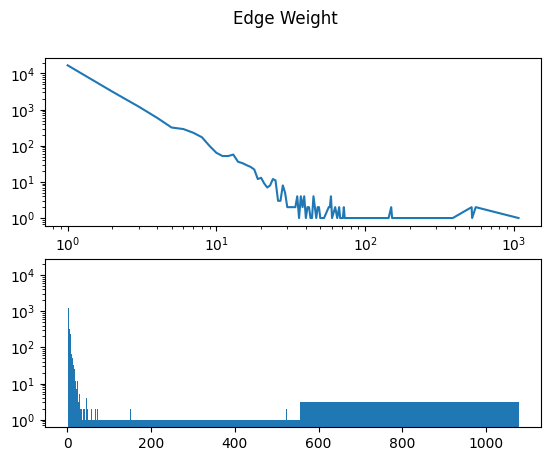

In [69]:
# توزیع وزن یال ها
weights_sequence = sorted([c for x,y, c in weights], reverse=False)
weightsCount = Counter(weights_sequence)
wgh, cnt = zip(*weightsCount.items())
fig, axs = plt.subplots(2)
fig.suptitle("Edge Weight")
axs[0].loglog(wgh, cnt,)
axs[1].hist(wgh,wgh,weights=cnt,log=True)
fig.show()

## 6. clustering coefficient

In [71]:
#میانگین ضریب خوشه پذیری
print('average clustering coefficient : ',nx.average_clustering(g))

average clustering coefficient :  0.028659637390576587


C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_1716\3937238072.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


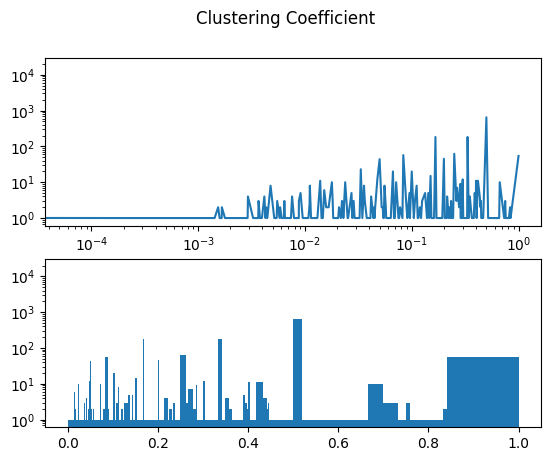

In [72]:
# توزیع ضریب خوشه پذیری
coefs=nx.clustering(g)
coef_sequence = sorted([c for id,c in coefs.items()], reverse=False)
coefCount = Counter(coef_sequence)
coef, cnt = zip(*coefCount.items())
fig, axs = plt.subplots(2)
fig.suptitle("Clustering Coefficient")
axs[0].loglog(coef, cnt,)
axs[1].hist(coef,coef,weights=cnt,log=True)
fig.show()

## 7. weakly connected components

In [ ]:

weakly_connected_components=[
    len(c)
    for c in sorted(nx.weakly_connected_components(g), key=len, reverse=True)
]
print('count of weakly connected components: ',len(weakly_connected_components))

count of weakly connected components:  4318


C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_21132\2156411052.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


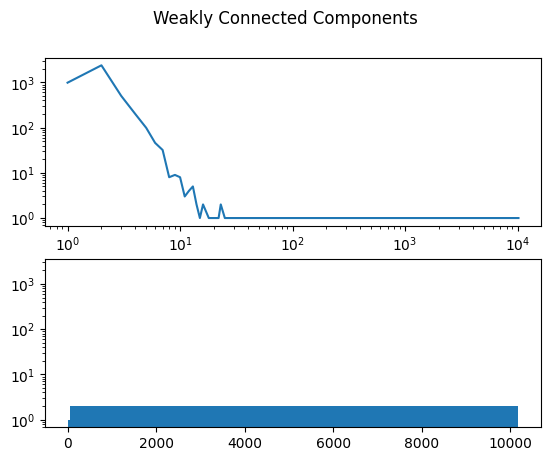

In [ ]:
wc_sequence = sorted(weakly_connected_components, reverse=False)
wcCount = Counter(wc_sequence)
wc, cnt = zip(*wcCount.items())
fig, axs = plt.subplots(2)
fig.suptitle("Weakly Connected Components")
axs[0].loglog(wc, cnt,)
axs[1].hist(wc,wc,weights=cnt,log=True)
fig.show()

In [ ]:
largest_wc = max(nx.weakly_connected_components(g), key=len)
print('size of largest component: ',len(largest_wc))
print('proportion of largest component: ',len(largest_wc)/len(g))


size of largest component:  10184
proportion of largest component:  0.5051587301587301


## 8. strongly connected components

In [ ]:
strongly_connected_components=[
    len(c)
    for c in sorted(nx.strongly_connected_components(g), key=len, reverse=True)
]
print('count of strongly connected components: ',len(strongly_connected_components))

count of strongly connected components:  19969


C:\Users\Mohammadreza\AppData\Local\Temp\ipykernel_21132\3926693759.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


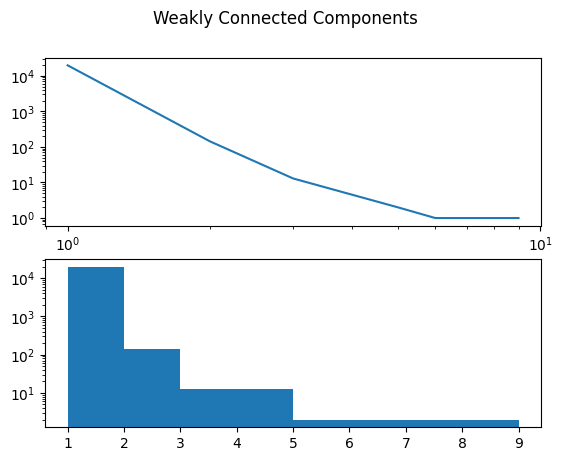

In [ ]:
sc_sequence = sorted(strongly_connected_components, reverse=False)
scCount = Counter(sc_sequence)
sc, cnt = zip(*scCount.items())
fig, axs = plt.subplots(2)
fig.suptitle("Weakly Connected Components")
axs[0].loglog(sc, cnt,)
axs[1].hist(sc,sc,weights=cnt,log=True)
fig.show()

In [ ]:
largest_sc = max(nx.strongly_connected_components(g), key=len)
print('size of largest component: ',len(largest_sc))
print('proportion of largest component: ',len(largest_sc)/len(g))

lsc_subgraph=g.subgraph(largest_sc)
print('diameter of largest component: ',nx.diameter(lsc_subgraph))

size of largest component:  9
proportion of largest component:  0.0004464285714285714
diameter of largest component:  2
